In [1]:
import pandas
import os
import time
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

data_dir = '/home/idies/workspace/Temporary/raddick/baseball_scratch/'
print('ok')

ok


In [2]:
s = time.time()
print('Reading stuff...')
games_df = pandas.read_csv(data_dir+'gamedata_extended.csv', low_memory=False, index_col='gameID')

print('Converting stuff...')
games_df.loc[:, 'date_from_games'] = pandas.to_datetime(games_df['date_from_games'])
games_df.loc[:, 'date_from_events'] = pandas.to_datetime(games_df['date_from_events'])

print('Calculating stuff...')
games_df = games_df.assign(theyear = games_df['date_from_games'].apply(lambda x: x.year))
games_df = games_df.assign(themonth = games_df['date_from_games'].apply(lambda x: x.month))
games_df = games_df.assign(yearmonth = games_df['date_from_games'].apply(lambda x: x.strftime('%Y-%m')))
games_df = games_df.assign(total_hr = (games_df['home_hr'] + games_df['visitor_hr']))

e = time.time()
print('Processed {0:,.0f} games in {1:.1f} seconds!'.format(len(games_df),e-s))

print('DONE!')



Reading stuff...
Converting stuff...
Calculating stuff...
Processed 220,245 games in 48.0 seconds!
DONE!


In [42]:
df = pandas.DataFrame(data=games_df[
    (games_df['theyear'] >= 2000) & 
    (games_df['themonth'] >= 4) & 
    (games_df['themonth'] <= 9)
].groupby('yearmonth')['total_hr'].sum())
df.columns = ['nHR']

df = df.assign(nGames = games_df[
    (games_df['theyear'] >= 2000) & 
    (games_df['themonth'] >= 4) & 
    (games_df['themonth'] <= 9)
].groupby('yearmonth').size())

df = df.assign(meanHR = games_df[
    (games_df['theyear'] >= 2000) & 
    (games_df['themonth'] >= 4) & 
    (games_df['themonth'] <= 9)
].groupby('yearmonth')['total_hr'].mean())

df = df.assign(semHR = games_df[
    (games_df['theyear'] >= 2000) & 
    (games_df['themonth'] >= 4) & 
    (games_df['themonth'] <= 9)
].groupby('yearmonth')['total_hr'].sem())

df
#games_df[
#    (games_df['theyear'] >= 2000) & 
#    (games_df['themonth'] >= 4 & games_df['themonth'] <= 9)
#].groupby('yearmonth')['total_hr'].sem()

,nHR,nGames,meanHR,semHR
yearmonth,,,,
2000-04,931.0,363,2.564738,0.093762
2000-05,1069.0,405,2.639506,0.089183
2000-06,982.0,396,2.479798,0.085551
2000-07,923.0,399,2.313283,0.080216
2000-08,865.0,423,2.044917,0.076992
2000-09,918.0,440,2.086364,0.070963
2001-04,860.0,368,2.336957,0.088601
2001-05,881.0,412,2.138350,0.076505
2001-06,997.0,409,2.437653,0.084541


Done


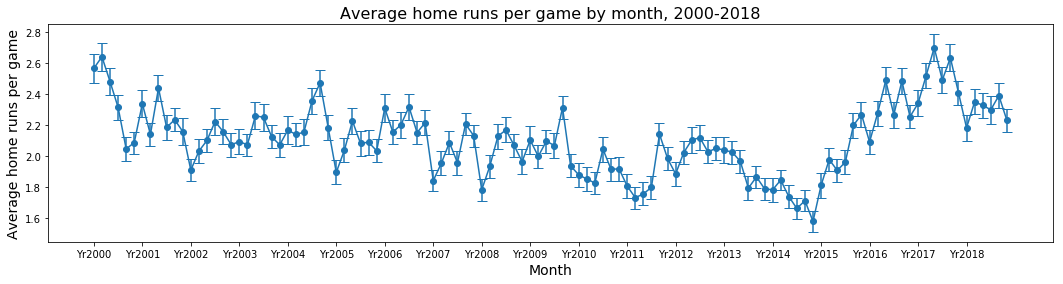

In [49]:
fig, ax = plt.subplots(1,1, figsize=(18,4))
#myFmt = mdates.DateFormatter("%Y-%m")
#locatos = mdates.DateLocator()
df['meanHR'].plot(ax=ax, marker='o', yerr=df['semHR'], capsize=5) # use 2*sem for 95% conf intervals

#ax.xaxis.set_major_locator(locatos)
#ax.xaxis.set_major_formatter(myFmt)

possible_labels = ['Yr'+x[0:4] for x in df.index.values.tolist()]
plt.xticks(np.arange(0,114,6), possible_labels[::6])

plt.xlabel('Month', fontsize=14)
plt.ylabel('Average home runs per game', fontsize=14)
plt.title('Average home runs per game by month, 2000-2018',fontsize=16)
#plt.show()
plt.savefig('avg_home_runs_per_month.png', format='png')
print('Done')
#games_df.dtypes
#games_df['total_hr'].dropna()


In [43]:
print('getting from backup...')
games_df = games_df_bk

mdf = pandas.DataFrame(games_df[
    (games_df['theyear'] >= 2000) & 
    (games_df['themonth'] >= 4) & 
    (games_df['themonth'] <= 9)
].groupby('themonth').size(), columns=['nGames'])

mdf = mdf.assign(nHR = games_df[
    (games_df['theyear'] >= 2000) & 
    (games_df['themonth'] >= 4) & 
    (games_df['themonth'] <= 9)
].groupby('themonth')['total_hr'].sum())

mdf = mdf.assign(meanHR = games_df[
    (games_df['theyear'] >= 2000) & 
    (games_df['themonth'] >= 4) & 
    (games_df['themonth'] <= 9)
].groupby('themonth')['total_hr'].mean())

mdf = mdf.assign(semHR = games_df[
    (games_df['theyear'] >= 2000) & 
    (games_df['themonth'] >= 4) & 
    (games_df['themonth'] <= 9)
].groupby('themonth')['total_hr'].sem())

mdf

getting from backup...


,nGames,nHR,meanHR,semHR
themonth,,,,
4,6929,14142.0,2.040987,0.018809
5,7972,16638.0,2.087055,0.017612
6,7649,16494.0,2.156360,0.018572
7,7391,15694.0,2.123393,0.018617
8,8035,17429.0,2.169135,0.017683
9,8012,16581.0,2.069521,0.017395


Done


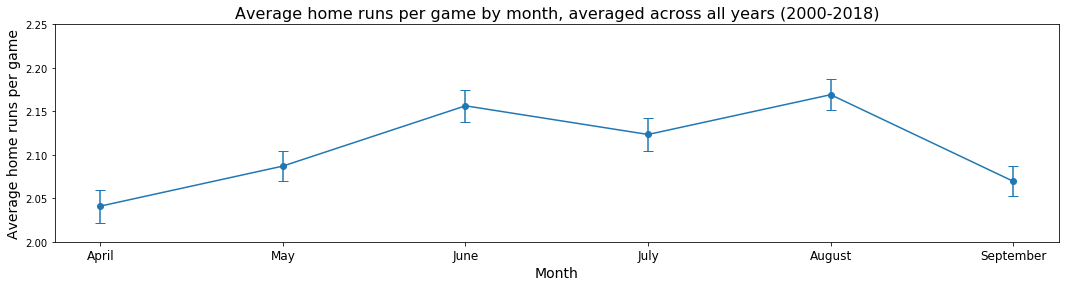

In [51]:
fig, ax = plt.subplots(1,1, figsize=(18,4))
#myFmt = mdates.DateFormatter("%Y-%m")
#locatos = mdates.DateLocator()
mdf['meanHR'].plot(ax=ax, marker='o', yerr=mdf['semHR'], capsize=5) # use 2*sem for 95% conf intervals

plt.ylim(2, 2.25)
plt.xticks(np.arange(4,10), ['April', 'May', 'June', 'July', 'August', 'September'], fontsize=12)

plt.xlabel('Month', fontsize=14)
plt.ylabel('Average home runs per game', fontsize=14)
plt.title('Average home runs per game by month, averaged across all years (2000-2018)', fontsize=16)

plt.savefig('avg_home_runs_overall_by_month.png', format='png')
print('Done')
#games_df.dtypes
#games_df['total_hr'].dropna()
#plt.show()